In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

The below code is reading the csv files and getting rid of the data before 1985

In [2]:
salaries = pd.read_csv('core/Salaries.csv')
battingTotals = pd.read_csv('core/Batting.csv')
players = pd.read_csv('core/People.csv')
pitching = pd.read_csv('core/Pitching.csv')
fielding = pd.read_csv('core/Fielding.csv')
teams = pd.read_csv('core/Teams.csv')


## data for salaries begins in 1985, so cut off everything in batting, teams, fielding, and pitching datasets totals before then for batting


battingTotals = battingTotals[battingTotals.yearID >= 1985]

teams = teams[teams.yearID >= 1985]

fielding = fielding[fielding.yearID >= 1985]

pitching = pitching[pitching.yearID >= 1985]

salaries = salaries.groupby(['playerID', 'yearID']).agg({'salary':'first' }).reset_index()




,yearID,teamID,lgID,playerID,salary
10220,1997,TEX,AL,tatisfe01,150000
11161,1998,SLN,NL,tatisfe01,170000
11222,1998,TEX,AL,tatisfe01,170000
12162,1999,SLN,NL,tatisfe01,270000
13012,2000,SLN,NL,tatisfe01,750000
13609,2001,MON,NL,tatisfe01,2750000
14466,2002,MON,NL,tatisfe01,4500000
15292,2003,MON,NL,tatisfe01,6500000
20317,2009,NYN,NL,tatisfe01,1700000
21141,2010,NYN,NL,tatisfe01,850000


,playerID,yearID,salary
23198,tatisfe01,1997,150000
23199,tatisfe01,1998,170000
23200,tatisfe01,1999,270000
23201,tatisfe01,2000,750000
23202,tatisfe01,2001,2750000
23203,tatisfe01,2002,4500000
23204,tatisfe01,2003,6500000
23205,tatisfe01,2009,1700000
23206,tatisfe01,2010,850000


The cell below grabs each player from each of their years played, and merges their salary to it based on the year and player id.

If a player is on multiple teams, the salary takes the first occurence and adds the hits together.

This also displays a graph showing the player ID and their hits and their salary per year.

<Axes: xlabel='H', ylabel='salary'>

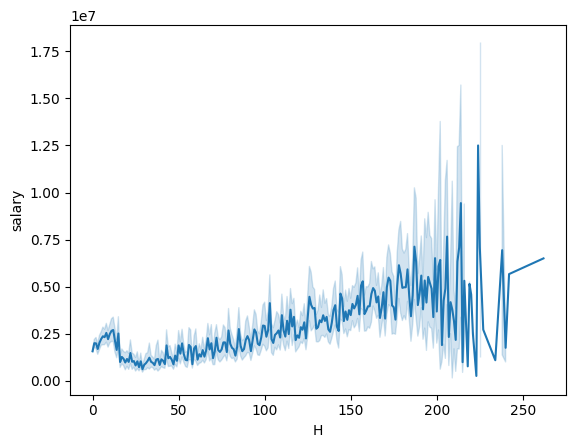

In [3]:

players = players[['playerID', 'bats', 'throws']]

battingPerYear = battingTotals[['playerID', 'H', 'yearID']]


salariesAndHits = pd.merge(battingPerYear, salaries, on=['playerID', 'yearID'])

salariesAndHits = salariesAndHits.groupby(['playerID', 'yearID']).agg({'H':'sum','salary':'first' }).reset_index()


plt.figure()


## line plot for salaries and hits
sns.lineplot(x='H', y='salary', data=salariesAndHits)








The cell below takes the salaries and pitching, and merges them based on player and year id.

If a player is on multiple teams, the salary takes the first occurence and adds the hits together.

Also displays two graphs: The first being the salary to strikeout line graph, while the second is strikeout and W line graph.

<Figure size 640x480 with 0 Axes>

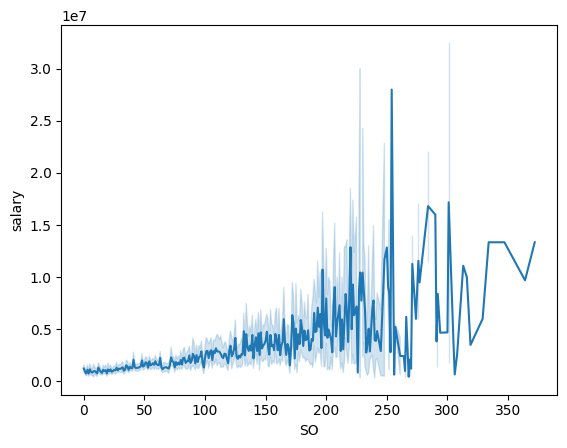

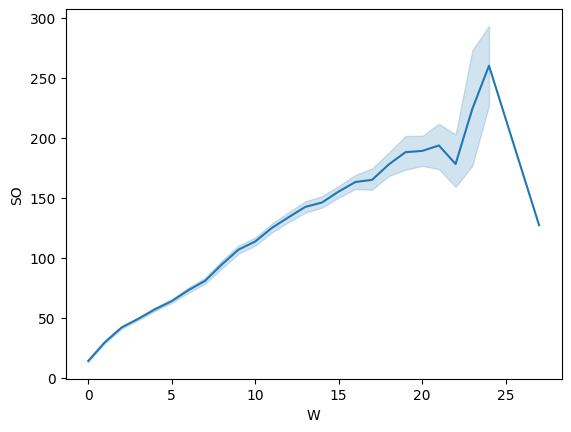

<Figure size 640x480 with 0 Axes>

In [4]:

salariesAndPitching = pd.merge(salaries, pitching, on=['playerID', 'yearID'])
salariesAndPitching = salariesAndPitching.groupby(['playerID', 'yearID']).agg({'SO':'sum','W':'sum','salary':'first' }).reset_index()

sns.lineplot(x='SO', y='salary', data=salariesAndPitching)
plt.figure()
sns.lineplot(x='W', y='SO', data=salariesAndPitching)
plt.figure()


## Definition of wins for a pitcher: Credited to the pitcher whose teams assumes a lead while such pitcher is in the game and does not relinquish such lead unless otherwise assigned by the official scorer.








The cell below takes the salaries and fielding, merging them together based on the yearID and the playerID.

We gather a fielding percentage and graph this with respect to their salary.

<Axes: xlabel='FieldingPercentage', ylabel='salary'>

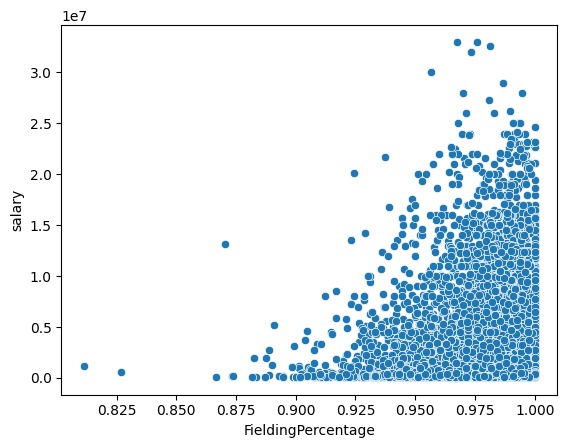

In [5]:
## Fielding statistics



fieldingPerPlayer = fielding.groupby(['playerID', 'yearID']).agg({'PO' : 'sum', 'A':'sum', 'E':'sum'}).reset_index()
## creating columns that give statistics such as total plays and fielding percentage 
fieldingPerPlayer['FieldingPercentage'] = (fieldingPerPlayer.PO + fieldingPerPlayer.A) / (fieldingPerPlayer.PO + fieldingPerPlayer.A + fieldingPerPlayer.E)
fieldingPerPlayer['totalPlays'] = (fieldingPerPlayer.PO + fieldingPerPlayer.A + fieldingPerPlayer.E)






fieldingAndSalaryPerPlayer = pd.merge(fieldingPerPlayer, salaries, on=['playerID', 'yearID'])


sns.scatterplot(x='FieldingPercentage', y='salary', data=fieldingAndSalaryPerPlayer[fieldingAndSalaryPerPlayer.totalPlays > 50])

The cell below contains the yearly salary per team per year, and compares it with their win percentage.

Because the U.S. dollar changes every year, I have a few samples of about 6 years of data that shows a correlation in win percentage and salary used that year.

<Axes: xlabel='WinPercentage', ylabel='salary'>

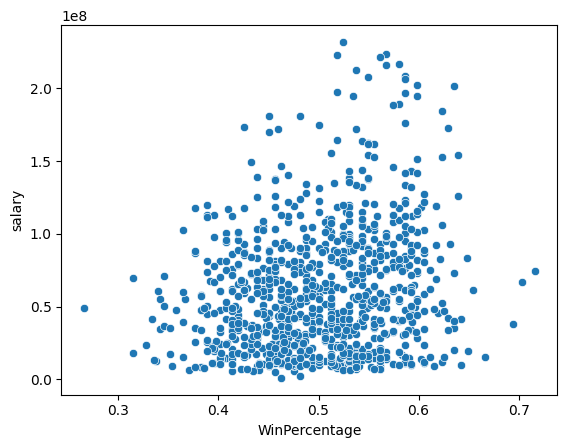

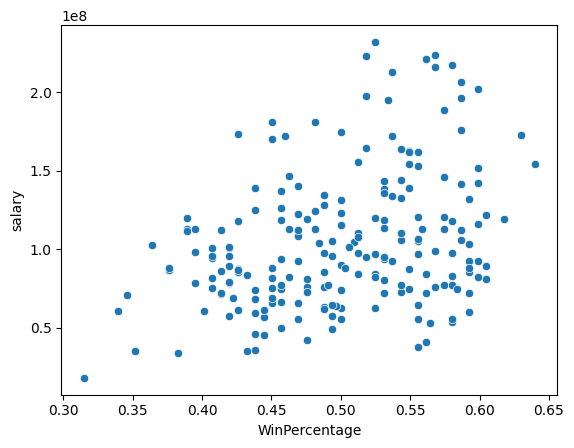

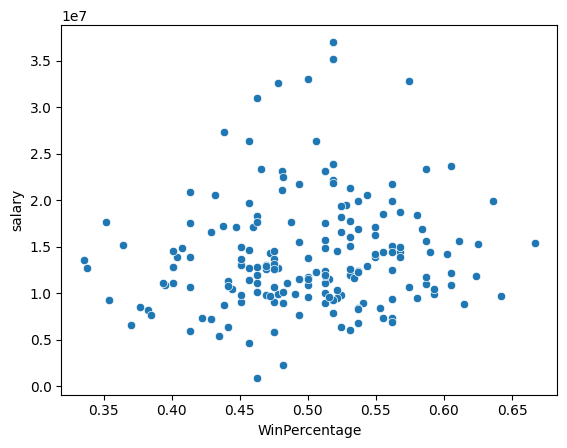

In [6]:
## Teams Salary and wins statistics
salaries = pd.read_csv('core/Salaries.csv')


teams = teams[['yearID', 'teamID','W', 'L']]
salariesPerYearPerTeam = salaries.groupby(['yearID','teamID']).agg({'salary' : 'sum'}).reset_index()

## merge the teams and salaries per year per team datasets
salariesAndWins = pd.merge(teams, salariesPerYearPerTeam, on=['teamID', 'yearID'])

salariesAndWins['WinPercentage'] = salariesAndWins.W / (salariesAndWins.W + salariesAndWins.L)

sns.scatterplot(x='WinPercentage',y='salary',data=salariesAndWins)
plt.figure()
sns.scatterplot(x='WinPercentage',y='salary',data=salariesAndWins[(salariesAndWins.yearID >= 2010) & (salariesAndWins.yearID <= 2016)])
plt.figure()
sns.scatterplot(x='WinPercentage',y='salary',data=salariesAndWins[(salariesAndWins.yearID >= 1985) & (salariesAndWins.yearID <= 1991)])



